<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/Hybrid_cec2014_D_30/Hybrid_Frannk_F5_gen_2000_par_100_dim_30_march_28_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 378 (delta 37), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (378/378), 327.66 KiB | 13.11 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/optim_raianars_Insight


In [2]:
# YOU NEED TO RUN THINGS IN DIM = 30 F6 TAKES MUCH LONGER TIME...

In [3]:
from scipy.optimize import differential_evolution
import numpy as np
from pandas import read_csv

In [4]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (286/286), done.
remote: Total 288 (delta 175), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (288/288), 461.04 KiB | 3.81 MiB/s, done.
Resolving deltas: 100% (175/175), done.
/content/optim_raianars_Insight/functions_cec2014_data


In [5]:

function_select = 'F5'
Function = F1_to_F27_cec2014_zero_to_hero.F5 
Shift_Rotate= cec2014_shift_rotate.F5 
problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [6]:
f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
F_bias = cec2014_names.BiasValue()[function_select]
type_fun = cec2014_names.TypeFunctions()[function_select]
Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

In [7]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=c98d429dcae566e755d908b861eaa029c5ddfc0e81a57cbd32f1f4c7a7cef1d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-mt6ouuo4/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [8]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 153MB/s]


In [9]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [10]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [11]:
shift_data_a = load_shift_data__(shift_data_file)[:problem_size]
matrix_a = load_matrix_data__(f_matrix)
if (type_fun == 'hybrid'):
  f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
  shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)
else:
  shuffle = matrix_a

In [12]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [13]:
 shift_data = shift_data_a
 matrix = matrix_a
 shuffle = shuffle
 def Hybrid(solution):
   resp = CEC2014(solution, shift_data = shift_data_a, matrix = matrix_a, shuffle = shuffle)
   return resp

In [14]:
# PSO 2016 
#  Gen =1000,1500, 2000
#  Npar= 20, 40, 80
#  dim = 10,20,30
# Dynamic parameter adaptation in particle swarm optimization
#  using interval type-2 fuzzy logic -Soft Comput (2016) 20:1057–1070

In [15]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 272 (delta 80), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (272/272), 660.83 KiB | 10.49 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/optim_raianars_Insight/functions_cec2014_data/Raianars_paper_One


In [16]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
#import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
fator = 2.0/3.0; 



In [17]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 378 (delta 37), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (378/378), 327.66 KiB | 12.60 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/optim_raianars_Insight/functions_cec2014_data/Raianars_paper_One/optim_raianars_Insight


In [18]:
#!git clone https://github.com/ucfilho/Raianars_paper_one_revisited/AddFunctions 
!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/functions_cec2014_data/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [19]:
############################### Função
import FunctionsNew
#'''  
############################### Função
dim= problem_size # 
fchoice=function_select
Fun=Hybrid
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)
 #fx=
#'''
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [20]:
!ls

cec2014		 Go2MinMax.py  __pycache__  shift_data_1.txt
FunctionsNew.py  M_1_D10.txt   README.md


In [21]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/functions_cec2014_data/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/ANN_read_matrix


In [22]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [23]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [24]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [25]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [26]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [27]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [28]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);print('Npar1=',NPAR1);print('frac=',fator)
NPAR2=NPAR-NPAR1;print('Npar2=',NPAR2);print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


Npar1= 66
frac= 0.6666666666666666
Npar2= 34
Npar= 100


In [29]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):

      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut, crossp,NPAR2, its,fobj,X2)
      
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;
      X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;
      X2[NPAR2-1,:] = BEST2;
    print('k=',iii,'time=',(time.time()-start_time)/60)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 1.640210258960724
k= 1 time= 3.251596661408742
k= 2 time= 4.870484375953675
k= 3 time= 6.487154587109884
k= 4 time= 8.104341757297515
k= 5 time= 9.721987501780193
k= 6 time= 11.338531335194906
k= 7 time= 12.954090432326
k= 8 time= 14.569744634628297
k= 9 time= 16.18194977839788
k= 10 time= 17.79398942788442
k= 11 time= 19.40612695614497
k= 12 time= 21.018499926726022
k= 13 time= 22.632773280143738
k= 14 time= 24.2455415169398
k= 15 time= 25.859419230620066
k= 16 time= 27.47410968542099
k= 17 time= 29.08615718285243
k= 18 time= 30.703457748889925
k= 19 time= 32.318430773417155
k= 20 time= 33.93130047718684
k= 21 time= 35.54380686283112
k= 22 time= 37.15443537632624
k= 23 time= 38.77002598047257
k= 24 time= 40.37972350120545
k= 25 time= 41.99517644246419
k= 26 time= 43.61167162656784
k= 27 time= 45.22929686705272
k= 28 time= 46.84185506105423
k= 29 time= 48.45541277329127
k= 30 time= 50.06962375640869
k= 31 time= 51.68095130125682
k= 32 time= 53.29418549140294
k= 33 time= 54.9

In [30]:
X1.shape

(66, 30)

In [31]:
#len(X2[1,:])
print(cols)

30


In [32]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [33]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0           322.945398     1.032245   0.00022         0.0      0.0  66.0   
1           324.407468     1.036918   0.00044         0.0      0.0  66.0   
2           325.638568     1.040853   0.00066         0.0      0.0  66.0   
3           323.516840     1.034072   0.00088         0.0      0.0  66.0   
4           323.935330     1.035409   0.00110         1.0      2.0  66.0   
...                ...          ...       ...         ...      ...   ...   
1995        320.850022     1.025548   0.43912         0.0      0.0  66.0   
1996        320.850022     1.025548   0.43934         0.0      0.0  66.0   
1997        320.850022     1.025548   0.43956         0.0      0.0  66.0   
1998        320.850022     1.025548   0.43978         1.0      1.0  66.0   
1999        320.850022     1.025548   0.44000         0.0      0.0  66.0   

            Fo           CRo        fmin        fmax  AD_fmin  AD_fmax  \
0     0.50000

Text(0, 0.5, 'CR')

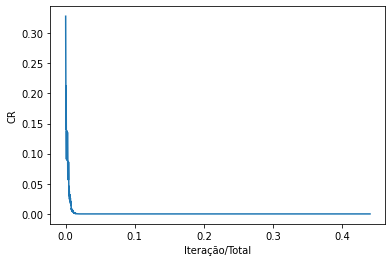

In [34]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

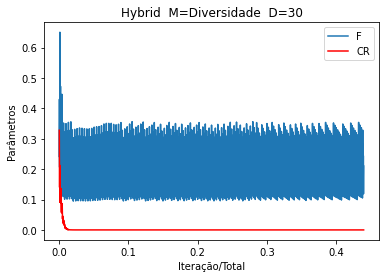

In [35]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Hybrid_Diversidade_D=30')

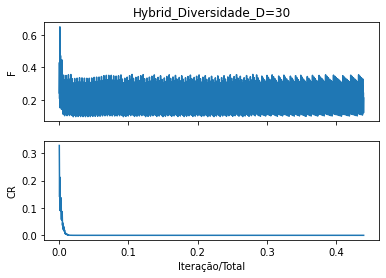

In [36]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [37]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 300000 Iterações= 2000 Dim= 30 Min/Max= -100 / 100 _ Hybrid
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-2000 

MÉDIA:  520.2764250219458
MIN __: 520.1479814657265
MAX__:  520.3533289947396
STD __: 0.04337159366586021
Tempo Médio= 96.879 segundos ---
50 Rodadas

BEST:  [ 2.40870533e+01 -5.47767974e+01 -8.86249730e+01  1.93273589e+01
  6.62430986e+01 -1.29063695e+00  2.60883065e+01  2.29169483e+01
 -1.89429209e+00  3.55894399e+01 -8.54353268e+01  6.55522879e+01
 -3.37582732e+01 -2.24272803e+01 -4.56493772e+01  8.25334406e+01
  6.57079768e+01 -3.05816419e+01  1.02191295e+01  5.46167255e-02
 -1.05935804e+01  2.90403191e+01 -3.76057471e+01  5.13017092e+01
 -9.89515986e+00 -2.13899313e+01  8.90462185e+01 -2.82086910e+01
  2.29993875e+01 -6.52786286e+01  5.20147981e+02]
